# SPAM/HAM Classification

### Reading the dataset

In [1]:
import pandas as pd

messages = pd.read_csv('dataset/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Data Cleaning and Preprocessing


In [2]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

corpus = []
#lowering + stemming + stopword removal
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /home/anjali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating the Bag of Words model

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# using max_length we are selecting the top 5000 most frequent words rather than selecting all the words that may not be important.
cv = CountVectorizer(max_features=5000)
#X will be the training dataset - independent variable
X = cv.fit_transform(corpus).toarray()

In [4]:
#get dummy variables for spam and ham representation - categorical representation
y = pd.get_dummies(messages['label'])
#consolidating the 2 categorical results obtained in the previous step to 1 column
# 1 for spam and 0 for ham - y here is the dependent variable
y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Train model using Naive Bayes Classifier

In [6]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [8]:
y_pred=spam_detect_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

### Compare results

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm

array([[940,  15],
       [  8, 152]])

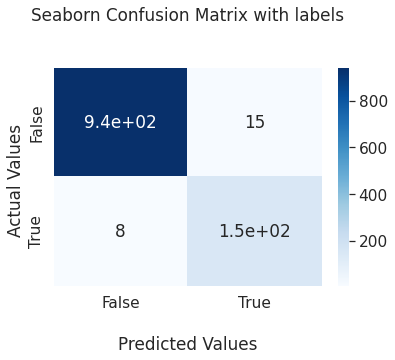

In [23]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


### Accuracy

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.98

